In [2]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler



In [3]:
Bankloan =pd.read_csv('bankloan.csv')
Bankloan



,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
missing_values_bankloan = Bankloan.isnull().sum()



In [5]:
databankloan = Bankloan.dropna()


In [6]:
# Encode categorical variables
bankloancatogroical = pd.get_dummies(databankloan)
bankloancatogroical

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [7]:
bankloan_numerical_columns = ['Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg', 'Education', 'Mortgage']


In [8]:
scaler = StandardScaler()
databankloan[bankloan_numerical_columns] = scaler.fit_transform(databankloan[bankloan_numerical_columns])






In [9]:
Y=Bankloan['Personal.Loan']

In [10]:
X = Bankloan.drop(['Personal.Loan'], axis = 1)

In [11]:
X_train_bankloan,X_test_bankloan,Y_train_bankloan,Y_test_bankoloan = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)


In [12]:
rf=RandomForestClassifier()
rf.fit(X_train_bankloan,Y_train_bankloan)

RandomForestClassifier()

In [13]:
y_pred_bankloan = rf.predict(X_test_bankloan)

In [14]:
accuracy_bankloan =accuracy_score(Y_test_bankoloan,y_pred_bankloan)
print("Accuracy:", accuracy_bankloan)

Accuracy: 0.989


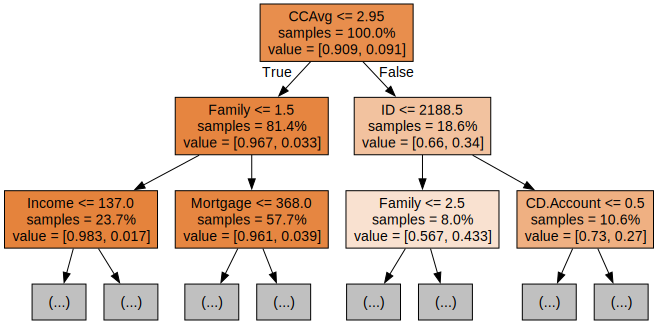

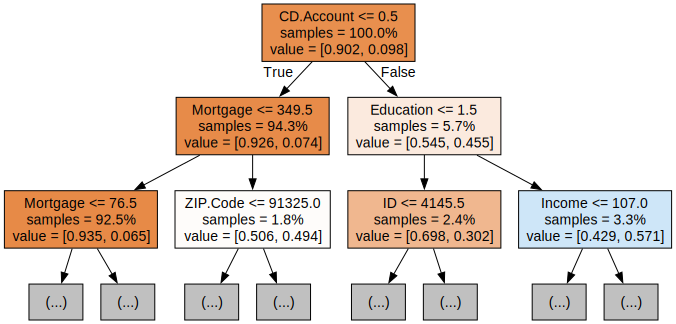

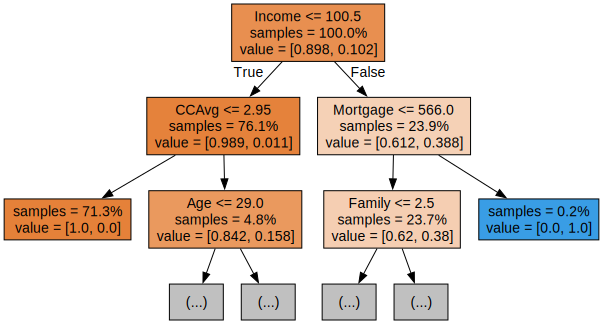

In [15]:
for i in range(3):
    tree_bankloan = rf.estimators_[i]
    dot_data=export_graphviz(tree_bankloan,feature_names=X_train_bankloan.columns,filled=True,max_depth=2,impurity=False,proportion=True)
    graph_banklona=graphviz.Source(dot_data)
    display(graph_banklona)


In [16]:
from sklearn.model_selection import RandomizedSearchCV
n_arr = [100,150,250]
acc =[]
for n in n_arr:
  rf=RandomForestClassifier(n_estimators=n)
  rf.fit(X_train_bankloan, Y_train_bankloan)
  y_pred_bankloan = rf.predict(X_test_bankloan)
  accuracy_bankloan =accuracy_score(Y_test_bankoloan,y_pred_bankloan)
  acc.append(accuracy_bankloan)
acc

[0.989, 0.989, 0.988]

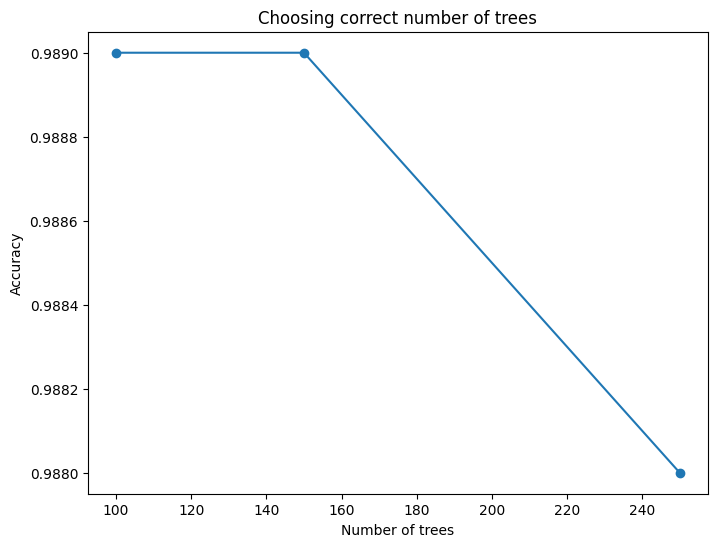

Best number of trees: 100


In [17]:
# Plot the accuracy scores for different number of trees
plt.figure(figsize=(8, 6))
plt.plot(n_arr, acc, marker='o')
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.title("Choosing correct number of trees")
plt.show()

# Choose the number of trees that gives the highest accuracy
best_n_trees = n_arr[np.argmax(acc)]
print(f"Best number of trees: {best_n_trees}")


In [18]:
n_estimators_bankloan=[64,100,128,200]
max_features_bankloan= [2,3,4]
bootstrap_bankloan = [True,False]
oob_score_bankloan = [True,False]

In [19]:
param_grid_bankloan = {'n_estimators':n_estimators_bankloan,
             'max_features':max_features_bankloan,
             'bootstrap':bootstrap_bankloan,
             'oob_score':oob_score_bankloan}  # Note, oob_score only makes sense when bootstrap=True!

In [20]:
Y.value_counts()


Personal.Loan
0    4520
1     480
Name: count, dtype: int64

In [21]:
confusion_matrix(Y_test_bankoloan, y_pred_bankloan)


array([[893,   2],
       [ 10,  95]], dtype=int64)

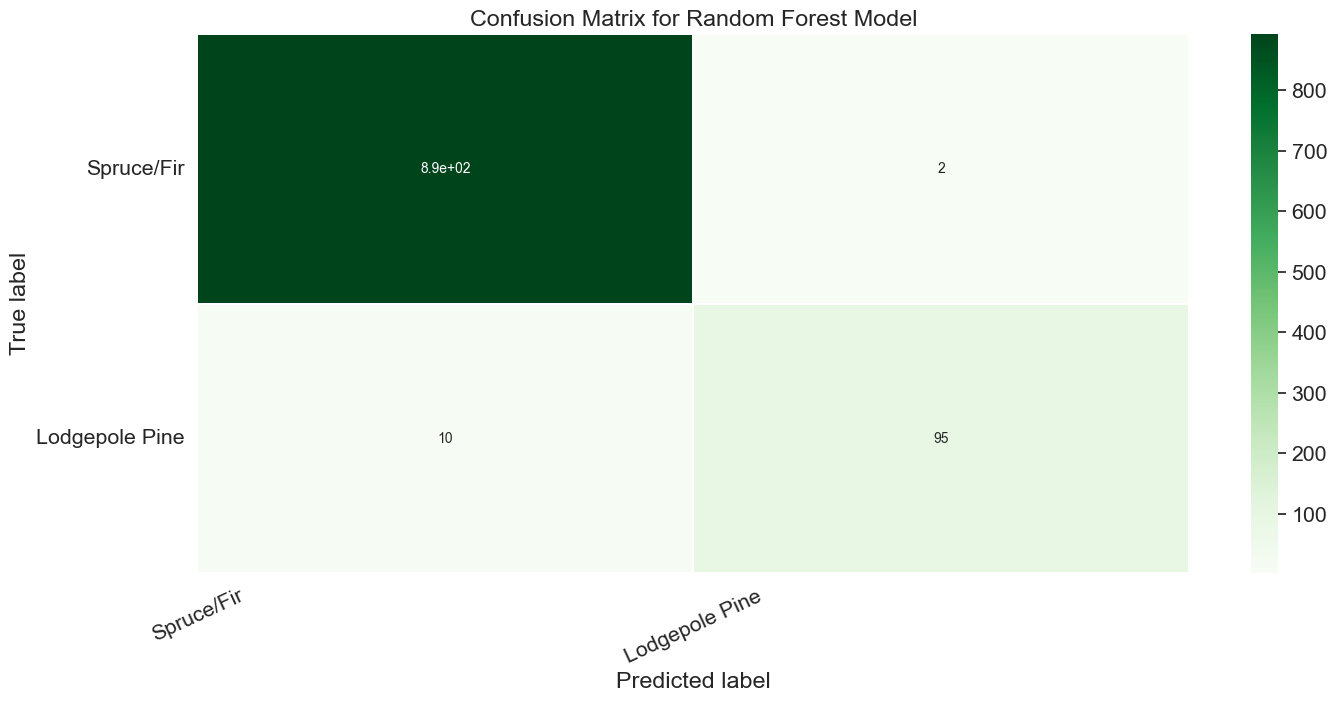

In [22]:
# Get and reshape confusion matrix data
matrix_bankloan = confusion_matrix(Y_test_bankoloan, y_pred_bankloan)


# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix_bankloan, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [23]:
print(classification_report(Y_test_bankoloan, y_pred_bankloan))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.98      0.90      0.94       105

    accuracy                           0.99      1000
   macro avg       0.98      0.95      0.97      1000
weighted avg       0.99      0.99      0.99      1000



In [24]:
accuracy_data_bankloan = {
    'Dataset': ['Dataset1', 'Dataset1', 'Dataset2', 'Dataset2'],
    'Model': ['Random Forest', 'Gradient Boosting', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [0.85, 0.88, 0.82, 0.85]
}

# Create a DataFrame from the accuracy data
accuracy_df_bankloan = pd.DataFrame(accuracy_data_bankloan)

# Pivot the DataFrame to have models as columns and datasets as rows
summary_table_bankloan = accuracy_df_bankloan.pivot(index='Dataset', columns='Model', values='Accuracy')

# Display the summary table
print(summary_table_bankloan)

Model     Gradient Boosting  Random Forest
Dataset                                   
Dataset1               0.88           0.85
Dataset2               0.85           0.82
